# Assignment #1: Predicting Employee Attrition / Burnout

### Members - NIU

Dallon Archibald - 100547834\
Keanu Simons - 100545207

In [1]:
import numpy as np

NIU = 100547834
np.random.seed(NIU)

## 1. EDA

First, we will load the data from a pickle (.pkl) file. This should be located at the root of the directory. Otherwise, run the below cell to upload the appropiate file, "attrition_available_26.pkl".

In [2]:
from google.colab import files
import io

uploaded = files.upload()

Saving attrition_available_26.pkl to attrition_available_26 (1).pkl


In [3]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
employee_data_df = pd.read_pickle("attrition_available_26.pkl")

We will observe the top and characteristics of the data to ensure it was properly loaded then separate the **target** ("Attrition") from the **feature** variables.

In [4]:
employee_data_df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,7.315971,13,2,4.0,3.0,2.0,4.0,31,Yes,Travel_Frequently,...,0.0,Y,23,8,1,6.0,3.0,5,1,4
6,6.450877,17,3,4.0,1.0,3.0,1.0,28,Yes,Travel_Rarely,...,2.0,Y,20,8,1,5.0,2.0,0,0,0
13,8.871421,14,2,3.0,1.0,2.0,2.0,47,Yes,Non-Travel,...,1.0,Y,11,8,2,10.0,4.0,10,9,9
28,10.713066,6,2,3.0,4.0,3.0,1.0,44,Yes,Travel_Frequently,...,3.0,Y,14,8,1,19.0,2.0,1,0,0
30,9.662808,11,2,NaN,1.0,2.0,3.0,26,Yes,Travel_Rarely,...,2.0,Y,11,8,0,5.0,5.0,3,0,2


In [5]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 1 to 3865
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      1426 non-null   float64
 1   absences                 1426 non-null   int64  
 2   JobInvolvement           1426 non-null   int64  
 3   PerformanceRating        1292 non-null   float64
 4   EnvironmentSatisfaction  1415 non-null   float64
 5   JobSatisfaction          1422 non-null   float64
 6   WorkLifeBalance          1413 non-null   float64
 7   Age                      1426 non-null   int64  
 8   Attrition                1426 non-null   object 
 9   BusinessTravel           1290 non-null   object 
 10  Department               1426 non-null   object 
 11  DistanceFromHome         1426 non-null   int64  
 12  Education                1276 non-null   float64
 13  EducationField           1426 non-null   object 
 14  EmployeeCount            1426

In [6]:
y = employee_data_df['Attrition']
X = employee_data_df.drop('Attrition', axis=1)

# Display the shape of features and target
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Feature names and target options
feature_names = X.columns.tolist()
target_names = y.unique()
print("Feature names:", feature_names)
print("Target options:", target_names)

Shape of X (features): (1426, 30)
Shape of y (target): (1426,)
Feature names: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Target options: ['Yes' 'No']


---
Considering the features, we can check which variables are **numerical** or **categorical**.

In [7]:
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']


We will find which have **high cardinality**, or the number of elements in a group, among the categorical columns.

In [9]:
categorical_cardinalities = X[categorical_cols].nunique()
print("The cardinality of each categorical column:")
categorical_cardinalities

The cardinality of each categorical column:


,0
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1


In [10]:
print("The two columns with the highest cardinality are:")
categorical_cardinalities.nlargest(2)

The two columns with the highest cardinality are:


,0
JobRole,9
EducationField,6


Additionally, we should encode these columns as integer representations as most machine learning models require numerical inputs. We will also create a backup to preserve the original values, if needed later.

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_cols_copy = X[categorical_cols].copy()

le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

---
Next, we will review the presence and occurence of values in the feature variables.

In [12]:
sg_val_cols = employee_data_df.columns[employee_data_df.nunique() == 1].tolist()
print("Columns with a constant value:", sg_val_cols)

Columns with a constant value: ['EmployeeCount', 'Over18', 'StandardHours']


Since these columns are constant, we can remove them from the feature sets to save computational power. We also remove EmployeeID, since this is just an arbitrary number and doens't provide value to the predictions

In [13]:
sg_val_cols.append('EmployeeID')
X.drop(sg_val_cols, axis=1, inplace=True)

feature_names = X.columns.tolist()

In [14]:
print("The following features contain missing values (NaN):")
for i, val in X.isnull().mean().items():
    if not val == 0:
        print(f'{i}: {val*100}%')

The following features contain missing values (NaN):
PerformanceRating: 9.396914446002805%
EnvironmentSatisfaction: 0.7713884992987377%
JobSatisfaction: 0.2805049088359046%
WorkLifeBalance: 0.9116409537166901%
Education: 10.518934081346423%
NumCompaniesWorked: 0.4908835904628331%
TotalWorkingYears: 0.1402524544179523%
TrainingTimesLastYear: 9.396914446002805%


We will use an IterativeImputer to fill missing values making predictions based on the other columns.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ii = IterativeImputer()
X = pd.DataFrame(ii.fit_transform(X))

Finally, since the target values belong either to 'No' or 'Yes', this indicates a **2-class classification problem**.

In [16]:
y.value_counts()

,count
Attrition,
No,715
Yes,711


In [17]:
y.value_counts() / y.count()

,count
Attrition,
No,0.501403
Yes,0.498597


The occurences of each value are nearly 50/50, so we have a balanced dataset.

## 2. Basic Methods: KNN and Trees

To start, we will train a simple KNN and Decision Tree model with default hyperparameters using 70% of the data for training and 30% for testing. These percentages were obtained following a rule of thumb to partition the data.

While it is possible to train a model using Linear Regression, we decided that using methods specifically designed for classification would be more effective and interpretable.

Furthermore, to keep track of the progression of accuracy scores, we will store trials in a dataframe as we progress.

In [18]:
scores = pd.DataFrame(columns=["Accuracy",'Confidence I.', "Method", "Runtime"])

### Simple Models

In [19]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from statsmodels.stats.proportion import proportion_confint


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=NIU)

knn_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

start = time.time()
knn_pipe.fit(X_train, y_train)
end = time.time()

y_pred = knn_pipe.predict(X_test)

accuracy_knn = metrics.accuracy_score(y_test, y_pred)
conf_int = proportion_confint(len(y_test) * accuracy_knn, len(y_test), method="wilson")
execution_time = end-start
print(f"Accuracy of the KNN model: {round(accuracy_knn*100,4)}%")
print(conf_int)
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [accuracy_knn, conf_int, "Simple KNN", execution_time]

Accuracy of the KNN model: 66.1215%
(0.6151183254381379, 0.7044433960715594)
Execution time: 0.01s


In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

# We do not need pipelines since scaling doesn't matter for trees
start = time.time()
tree_clf.fit(X_train, y_train)
end = time.time()

y_pred = tree_clf.predict(X_test)

accuracy_trees = metrics.accuracy_score(y_test, y_pred)
conf_int = proportion_confint(len(y_test) * accuracy_trees, len(y_test), method="wilson")
execution_time = end-start
print(f"Accuracy of the DecisionTree model: {round(accuracy_trees*100,4)}%")
print(conf_int)
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [accuracy_trees, conf_int, "Simple Tree", execution_time]

Accuracy of the DecisionTree model: 86.215%
(0.826254000125583, 0.8916020409469251)
Execution time: 0.01s


Based on the mediocre accuracy of our model, particularly for KNN, we see that it could be improved. Our thought is to loop over different test sizes and re-train our model to identify which is the best.

### Determining the Ideal Train/Test Split

As a takeaway, we notice that the DecisionTree has a higher accuracy than the KNN method, and we wonder if the accuracy can be improved with a more sophisticated train/test split. We try a loop of different distributions to find this ideal split. Additionally, we report confidence interval to help inform our determination.

In [21]:
for size in np.round(np.arange(0.05, 0.45, 0.05), 2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=NIU)

  clf = DecisionTreeClassifier()

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accuracy_trees = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy of the model at test size {size}: {round(accuracy_trees*100,4)}%")
  print(proportion_confint(len(y_test) * accuracy_trees, len(y_test), method="wilson"))

Accuracy of the model at test size 0.05: 90.2778%
(0.8126495420487314, 0.9521036800263443)
Accuracy of the model at test size 0.1: 84.6154%
(0.7780429965432463, 0.8961535198567125)
Accuracy of the model at test size 0.15: 85.514%
(0.8017218321405751, 0.896033318889292)
Accuracy of the model at test size 0.2: 88.1119%
(0.8384669449153125, 0.9136683806761251)
Accuracy of the model at test size 0.25: 85.9944%
(0.8200999715380206, 0.8921241748777771)
Accuracy of the model at test size 0.3: 87.3832%
(0.839013662489835, 0.901999025068883)
Accuracy of the model at test size 0.35: 81.8%
(0.7817973646706083, 0.8493535547958443)
Accuracy of the model at test size 0.4: 79.6848%
(0.7619134785376289, 0.8278143408431609)


From this, we choose to adjust our test split to 0.25 because:
- Although lower test sizes provide a higher accuracy, the confidence intervals are very wide, as a result of **overfitting**. These test sets are too small to be representative of the larger data population, so the models capture noise and random fluctuations in training.
- At 0.25, the accuracy stabilizes and the confidence interval becomes reasonably narrow.
- Accuracy starts to diminish rapidly after this point, as more complex models need a larger training set to learn meaningful patterns.

So, we retrain our models using the 0.25 train/test split and observe a slight increase in accuracy for each.

In [22]:
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=NIU)

In [23]:
knn_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

start = time.time()
knn_pipe.fit(X_train, y_train)
end = time.time()

knn_y_pred = knn_pipe.predict(X_test)

accuracy_knn = metrics.accuracy_score(y_test, knn_y_pred)
conf_int = proportion_confint(len(y_test) * accuracy_knn, len(y_test), method="wilson")
execution_time = end-start
print(f"Accuracy of the new KNN model: {round(accuracy_knn*100,4)}%")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [accuracy_knn, conf_int, "Improved KNN", execution_time]

Accuracy of the new KNN model: 66.3866%
Execution time: 0.01s


In [24]:
tree_clf = DecisionTreeClassifier()

start = time.time()
tree_clf.fit(X_train, y_train)
end = time.time()

tree_y_pred = tree_clf.predict(X_test)

accuracy_trees = metrics.accuracy_score(y_test, tree_y_pred)
conf_int = proportion_confint(len(y_test) * accuracy_trees, len(y_test), method="wilson")
execution_time = end-start
print(f"Accuracy of the new DecisionTree model: {round(accuracy_trees*100,4)}%")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [accuracy_trees, conf_int,"Improved Tree", execution_time]

Accuracy of the new DecisionTree model: 86.5546%
Execution time: 0.01s


### Dummy Method

We will compare these basic models with a dummy classifier to see if they are actually recognizing patterns in the dataset. The method we will compare them against is **stratified**, which makes random predictions respecting the class distributions of the training set.

In [25]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='stratified', random_state=42)

start = time.time()
clf.fit(X_train, y_train)
end = time.time()

accuracy_dummy = metrics.accuracy_score(y_test, clf.predict(X_test))
conf_int = proportion_confint(len(y_test) * accuracy_dummy, len(y_test), method="wilson")
execution_time = end-start
print(f"Accuracy of the most frequent dummy method is {round(accuracy_dummy*100,4)}%")
print(f"Does our KNN model outperform the dummy classifier? {accuracy_knn > accuracy_dummy}")
print(f"Does our DecisionTree model outperform the dummy classifier? {accuracy_trees > accuracy_dummy}")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [accuracy_dummy, conf_int, "Dummy", execution_time]

Accuracy of the most frequent dummy method is 50.4202%
Does our KNN model outperform the dummy classifier? True
Does our DecisionTree model outperform the dummy classifier? True
Execution time: 0.00s


The KNN and DecisionTree models achieved an accuracy around 66% and 87% respectively, outperforming the dummy classifier which had an accuracy of about 50%. While the dummy method was near equivalent to flipping a coin, our KNN and DecisionTree models leveraged relationships among the features to make informed predictions. A comparison of accuracy validates this significance.

### Visualizations

To visualize our KNN model, we will stack actual values against predictions for the first five instances. We can see that the beginning entry is incorrect.

In [26]:
header = np.array([["Test Set", "Prediction"]])

print(np.vstack((header, np.hstack((np.array(y_test)[:5, np.newaxis], np.array(knn_y_pred)[:5, np.newaxis])))))

[['Test Set' 'Prediction']
 ['Yes' 'No']
 ['Yes' 'Yes']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']]


For our DecisionTree model, we must note that it is difficult to visualize our model as it has a lot of levels due to using default hyerparameters. We will observe it both as text and graphically.

In [27]:
from sklearn import tree

print(tree.export_text(tree_clf, feature_names=feature_names))

|--- hrs <= 7.77
|   |--- Age <= 31.50
|   |   |--- YearsAtCompany <= 2.50
|   |   |   |--- JobRole <= 7.50
|   |   |   |   |--- StockOptionLevel <= 2.50
|   |   |   |   |   |--- MaritalStatus <= 0.50
|   |   |   |   |   |   |--- StockOptionLevel <= 0.50
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- StockOptionLevel >  0.50
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- MaritalStatus >  0.50
|   |   |   |   |   |   |--- PercentSalaryHike <= 23.50
|   |   |   |   |   |   |   |--- MonthlyIncome <= 180410.00
|   |   |   |   |   |   |   |   |--- absences <= 11.50
|   |   |   |   |   |   |   |   |   |--- PerformanceRating <= 3.66
|   |   |   |   |   |   |   |   |   |   |--- JobRole <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- JobRole >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- PerformanceRating >

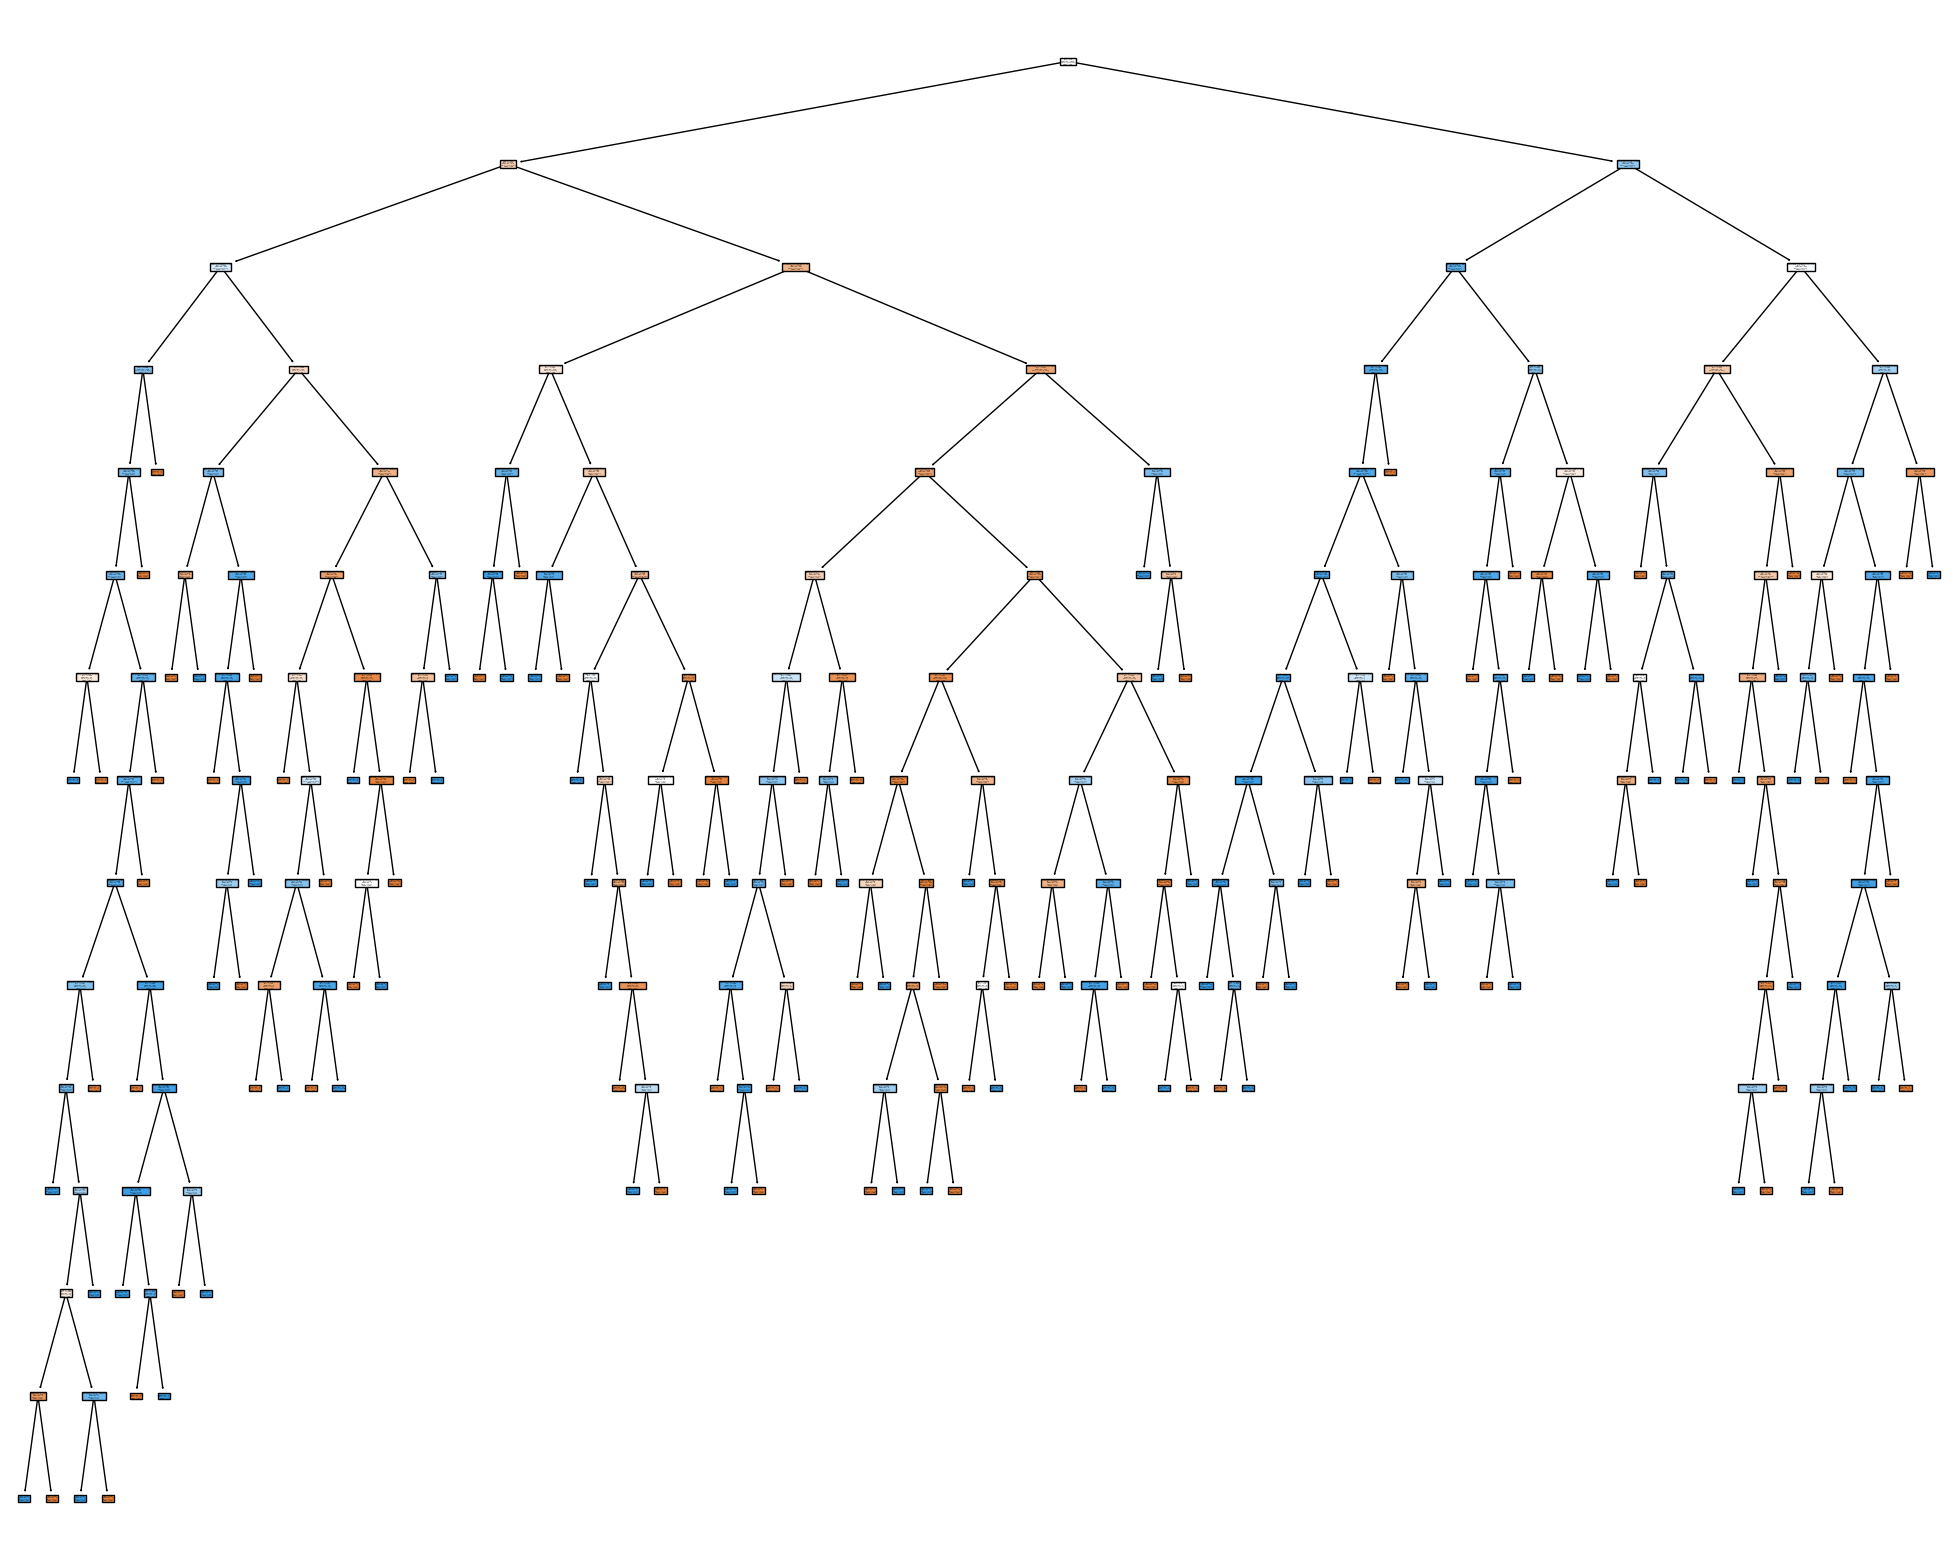

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names = feature_names,
                   class_names= target_names,
                   filled=True)

## 3. Hyperparameter Optimization/Tuning

Along with an ideal train/test split, there are other ways to improve accuracy, such as hyperparameter tuning. Please note that, by default, we will be using a 5-fold cross-validation.

### Prearranged Parametrical Space

With a prearranged parametrical space, we will define a fixed grid of hyperparameters for our methods to select from. First, we will use **grid search** which exhaustively samples every parameter combination.

In [29]:
param_grid_tree = {
    'max_depth': list(range(2,16,2)),
    'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}
param_grid_knn = {
    'n_neighbors': list(range(1,29,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming']
}

In [30]:
from sklearn.model_selection import GridSearchCV

grid_search_tree = GridSearchCV(DecisionTreeClassifier(),
                                param_grid_tree,
                                scoring='accuracy',
                                n_jobs=1, verbose=1)

tree_start = time.time()
grid_search_tree.fit(X_train, y_train)
tree_end = time.time()

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               scoring='accuracy',
                               n_jobs=1, verbose=1,)

knn_start = time.time()
grid_search_knn.fit(X_train, y_train)
knn_end = time.time()

accuracy_gridsearch_knn = metrics.accuracy_score(y_test, grid_search_knn.predict(X_test))
conf_int = proportion_confint(len(y_test) * accuracy_gridsearch_knn, len(y_test), method="wilson")
execution_time = end-start

print("-- Best Hyper-Parameters from GridSearch --")
print(f"For Trees: {grid_search_tree.best_params_} with best score {round(grid_search_tree.best_score_ * 100, 4)}%")
print(f"For KNN: {grid_search_knn.best_params_} with best score {round(grid_search_knn.best_score_ * 100, 4)}%")
print(f"DecisionTree Execution time: {tree_end-tree_start:.2f}s")
print(f"KNN Execution time: {knn_end-knn_start:.2f}s")
scores.loc[len(scores)] = [accuracy_gridsearch_knn, conf_int, "GridSearch KNN", execution_time]

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 140 candidates, totalling 700 fits
-- Best Hyper-Parameters from GridSearch --
For Trees: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 2} with best score 82.2329%
For KNN: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'} with best score 82.7866%
DecisionTree Execution time: 7.07s
KNN Execution time: 13.87s


We notice that the optimal hyperparameters for the trees are on the border of our searching space. Knowing that our tree should include many different variables, we extend the searching space to check if there are even better parameters.

In [31]:
param_grid_tree = {
    'max_depth': list(range(2,40,2)),
    'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(),
                                param_grid_tree,
                                scoring='accuracy',
                                n_jobs=1, verbose=1)
tree_start = time.time()
grid_search_tree.fit(X_train, y_train)
tree_end = time.time()

accuracy_gridsearch_tree = metrics.accuracy_score(y_test, grid_search_tree.predict(X_test))
conf_int = proportion_confint(len(y_test) * accuracy_gridsearch_tree, len(y_test), method="wilson")
execution_time = end-start

print("-- Best Hyper-Parameters from GridSearch --")
print(f"For Trees: {grid_search_tree.best_params_} with best score {round(grid_search_tree.best_score_ * 100, 4)}%")
print(f"DecisionTree Execution time: {tree_end-tree_start:.2f}s")
scores.loc[len(scores)] = [accuracy_gridsearch_tree, conf_int, "GridSearch Tree", execution_time]

Fitting 5 folds for each of 304 candidates, totalling 1520 fits
-- Best Hyper-Parameters from GridSearch --
For Trees: {'criterion': 'gini', 'max_depth': 38, 'min_samples_split': 2} with best score 83.5417%
DecisionTree Execution time: 18.75s


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Indeed, we do find a better set of hyperparameters. Grid Search enables us to check all possible combinations to ensure the optimal set of hyperparameters within our specified range is found. It is simple to understand and repeatable. However, the search time grows exponentially as the size of the search space increases and it may miss optimal configurations between grid points.

 Next, we will try **random search**, reducing the number of parameters tried based on a specified budget.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

RS_BUDGET=20

random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                                        param_grid_tree,
                                        n_iter=RS_BUDGET,
                                        scoring='accuracy',
                                        n_jobs=1, verbose=1,
                                        random_state=NIU)
tree_start = time.time()
random_search_tree.fit(X_train, y_train)
tree_end = time.time()

accuracy_randomsearch_tree = metrics.accuracy_score(y_test, random_search_tree.predict(X_test))
conf_int_tree = proportion_confint(len(y_test) * accuracy_randomsearch_tree, len(y_test), method="wilson")
tree_execution_time = tree_end-tree_start

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                       param_grid_knn,
                                       n_iter=RS_BUDGET,
                                       scoring='accuracy',
                                       n_jobs=1, verbose=1,
                                       random_state=NIU)
knn_start = time.time()
random_search_knn.fit(X_train, y_train)
knn_end = time.time()

accuracy_randomsearch_KNN = metrics.accuracy_score(y_test, random_search_knn.predict(X_test))
conf_int_KNN = proportion_confint(len(y_test) * accuracy_randomsearch_KNN, len(y_test), method="wilson")
KNN_execution_time = knn_end-knn_start

print("-- Best Hyper-Parameters from RandomSearch --")
print(f"For Trees: {random_search_tree.best_params_} with best score {round(random_search_tree.best_score_ * 100, 4)}%")
print(f"For KNN: {random_search_knn.best_params_} with best score {round(random_search_knn.best_score_ * 100, 4)}%")
print(f"DecisionTree Execution time: {tree_end-tree_start:.2f}s")
print(f"KNN Execution time: {knn_end-knn_start:.2f}s")
scores.loc[len(scores)] = [accuracy_randomsearch_KNN, conf_int_KNN ,"RandomSearch KNN", KNN_execution_time]
scores.loc[len(scores)] = [accuracy_randomsearch_tree, conf_int_tree,"RandomSearch Tree", tree_execution_time]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
-- Best Hyper-Parameters from RandomSearch --
For Trees: {'min_samples_split': 5, 'max_depth': 10, 'criterion': 'gini'} with best score 80.5471%
For KNN: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'} with best score 82.6945%
DecisionTree Execution time: 1.22s
KNN Execution time: 1.67s


Random Search gives equal chance to each combination and reduces computational strain. On the contrary, there is no guarantee we will find the optimal hyperparameters, it may wastefully sample redundant regions of the search space, and it is similarly restrained by the budget.

### Sampled Parametrical Space

With a sampled parametrical space, only a subset configurations are selected for evaluation based on predefined probability distributions. This enables us to explore the search space more optimally.

To start, we will use Random Search again, instead sampling from a continuous distribution.

In [33]:
from scipy.stats import randint, uniform

param_dist_tree = {
    'max_depth': randint(2, 40),
    'min_samples_split': randint(2, 100),
    'criterion': ['gini', 'entropy']
}
param_dist_knn = {
    'n_neighbors': randint(1, 29),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming']
}


In [34]:
random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                                        param_grid_tree,
                                        n_iter=RS_BUDGET,
                                        scoring='accuracy',
                                        n_jobs=1, verbose=1,
                                        random_state=NIU)
tree_start = time.time()
random_search_tree.fit(X_train, y_train)
tree_end = time.time()

accuracy_randomsearch_tree = metrics.accuracy_score(y_test, random_search_tree.predict(X_test))
conf_int_tree = proportion_confint(len(y_test) * accuracy_randomsearch_tree, len(y_test), method="wilson")
tree_execution_time = tree_end-tree_start

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                       param_grid_knn,
                                       n_iter=RS_BUDGET,
                                       scoring='accuracy',
                                       n_jobs=1, verbose=1,
                                       random_state=NIU)
knn_start = time.time()
random_search_knn.fit(X_train, y_train)
knn_end = time.time()

accuracy_randomsearch_KNN = metrics.accuracy_score(y_test, random_search_knn.predict(X_test))
conf_int_KNN = proportion_confint(len(y_test) * accuracy_randomsearch_KNN, len(y_test), method="wilson")
KNN_execution_time = knn_end-knn_start

print("-- Best Hyper-Parameters from RandomSearch --")
print(f"For Trees: {random_search_tree.best_params_} with best score {round(random_search_tree.best_score_ * 100, 4)}%")
print(f"For KNN: {random_search_knn.best_params_} with best score {round(random_search_knn.best_score_ * 100, 4)}%")
print(f"DecisionTree Execution time: {tree_end-tree_start:.2f}s")
print(f"KNN Execution time: {knn_end-knn_start:.2f}s")
scores.loc[len(scores)] = [accuracy_randomsearch_KNN, conf_int_KNN,"RandomSearch_Sampled KNN", KNN_execution_time]
scores.loc[len(scores)] = [accuracy_randomsearch_tree, conf_int_tree,"RandomSearch_Sampled Tree", tree_execution_time]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
-- Best Hyper-Parameters from RandomSearch --
For Trees: {'min_samples_split': 5, 'max_depth': 18, 'criterion': 'entropy'} with best score 79.8912%
For KNN: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'} with best score 82.6945%
DecisionTree Execution time: 1.16s
KNN Execution time: 3.19s


Random Search suffers from the same shortcomings as before. However, we are now able to sample from a custom distribution and can take this a step further.

Using **Optuna**, we can fine-grain our tuning by dynamically exploring the search space. This process is guided by the performance of past trials to more intelligently select the most promising hyperparameter configurations.

In [35]:
!pip install optuna
!pip install optuna-integration --user
!pip install optuna-integration[sklearn]

In [36]:
from optuna.distributions import IntDistribution as IntDist, CategoricalDistribution as CatDist

param_optuna_trees = {
    'max_depth': IntDist(2,40),
    'min_samples_split': IntDist(2,100),
    'criterion': CatDist(['gini', 'entropy'])
}
param_optuna_knn = {
    'n_neighbors': IntDist(1, 29),
    'weights': CatDist(['uniform', 'distance']),
    'metric': CatDist(['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming'])
}

In [37]:
import optuna

opt_budget = 50
optuna_search_tree = optuna.integration.OptunaSearchCV(DecisionTreeClassifier(),
                                                        param_optuna_trees,
                                                        scoring='accuracy',
                                                        n_trials=opt_budget,
                                                        n_jobs=1, verbose=1,
                                                        timeout=600,
                                                        random_state=NIU,
                                                        refit=True)
tree_start = time.time()
optuna_search_tree.fit(X_train, y_train)
tree_end = time.time()

accuracy_optuna_tree = metrics.accuracy_score(y_test, optuna_search_tree.predict(X_test))
conf_int_tree = proportion_confint(len(y_test) * accuracy_optuna_tree, len(y_test), method="wilson")
tree_execution_time = tree_end-tree_start

optuna_search_knn = optuna.integration.OptunaSearchCV(KNeighborsClassifier(),
                                                      param_optuna_knn,
                                                      scoring='accuracy',
                                                      n_trials=opt_budget,
                                                      n_jobs=1, verbose=1,
                                                      timeout=600,
                                                      random_state=NIU,
                                                      refit=True)
knn_start = time.time()
optuna_search_knn.fit(X_train, y_train)
knn_end = time.time()

accuracy_optuna_KNN = metrics.accuracy_score(y_test, optuna_search_knn.predict(X_test))
conf_int_KNN = proportion_confint(len(y_test) * accuracy_optuna_KNN, len(y_test), method="wilson")
KNN_execution_time = knn_end-knn_start

print("-- Best Hyper-Parameters from OptunaSearch --")
print(f"For Trees: {optuna_search_tree.best_params_} with best score {round(optuna_search_tree.best_score_ * 100, 4)}%")
print(f"For KNN: {optuna_search_knn.best_params_} with best score {round(optuna_search_knn.best_score_ * 100, 4)}%")
print(f"DecisionTree Execution time: {tree_end-tree_start:.2f}s")
print(f"KNN Execution time: {knn_end-knn_start:.2f}s")
scores.loc[len(scores)] = [accuracy_optuna_KNN, conf_int_KNN, "Optuna KNN", KNN_execution_time]
scores.loc[len(scores)] = [accuracy_optuna_tree, conf_int_tree, "Optuna Tree", tree_execution_time]

<ipython-input-37-bedebb9c2fee>:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_tree = optuna.integration.OptunaSearchCV(DecisionTreeClassifier(),
[I 2024-12-02 22:27:16,667] A new study created in memory with name: no-name-bf8a44db-60ae-43e6-92cf-a6bc36615d0c
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 1069 samples...
[I 2024-12-02 22:27:16,745] Trial 0 finished with value: 0.7979904348207627 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7979904348207627.
[I 2024-12-02 22:27:16,808] Trial 1 finished with value: 0.7353077969373876 and parameters: {'max_depth': 24, 'min_samples_split': 30, 'criterion': 'gini'}. Best is trial 0 with value: 0.7979904348207627.
[I 2024-12-02 22:27:16,882] Trial 2 finished with value: 0.715659690228599 and parameters: {'max_depth': 25, 'min_samples_split': 50, 'criter

-- Best Hyper-Parameters from OptunaSearch --
For Trees: {'max_depth': 13, 'min_samples_split': 2, 'criterion': 'gini'} with best score 82.8867%
For KNN: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'hamming'} with best score 83.5347%
DecisionTree Execution time: 7.98s
KNN Execution time: 11.34s


We will also examine the accuracy from the Optuna method.

In [38]:
print(f"DecisionTree accuracy with Optuna HPO: {round(metrics.accuracy_score(y_test, optuna_search_tree.predict(X=X_test))*100,4)}%")
print(f"KNN accuracy with Optuna HPO: {round(metrics.accuracy_score(y_test, optuna_search_knn.predict(X=X_test))*100,4)}%")

DecisionTree accuracy with Optuna HPO: 86.2745%
KNN accuracy with Optuna HPO: 86.8347%


### HPO Conclusion

As expected, we notice that GridSearch and Oputuna provide the highest scores, with Optuna coming out on top. Processing the entire search space is computationally expensive, so sampling allows us to find strong models while being fast and efficient. This makes Optuna our intended approach, as we can explore large, complex hyperparameters without exhaustive search and focus on areas that are likely to perform well, thus achieving better results with fewer evaluations.

Let's visualize at what point the best hyperparameter configuration was found across our Optuna trials.

In [39]:
pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


<ipython-input-40-b1d7df56a54f>:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(trial)


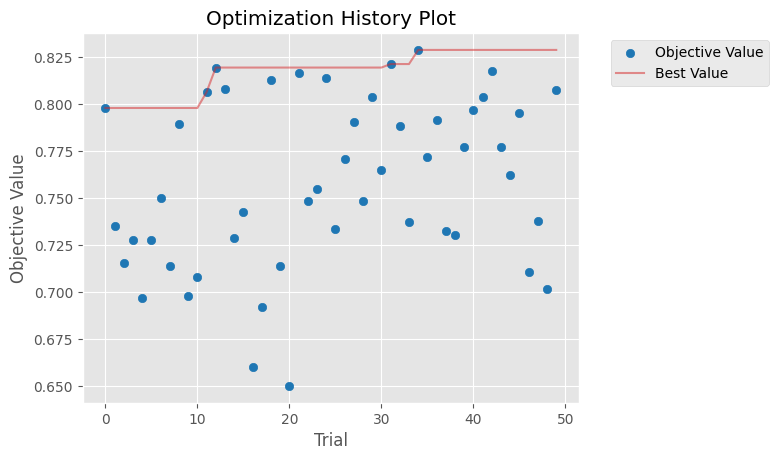

In [40]:
from optuna.visualization.matplotlib import plot_optimization_history
import matplotlib.pyplot as plt

trial = optuna_search_tree.study_
plot_optimization_history(trial)
plt.show()

## 4. Advanced Methods: Random Forests, SVMs, & XGBoost

To expand, we will experiment with more advanced methods to see if we can build a stronger model using the strengths we have already discovered.

### RandomForest

**RandomForests** aggregate multiple DecisionTrees to improve prediction accuracy and control overfitting. It uses bagging to randomly select the data with replacement, ensuring robustness and coverage across trees. We will try it with default values first.

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=NIU)

start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()

y_pred = rf_clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
conf_int_RF = proportion_confint(len(y_test) * acc, len(y_test), method="wilson")
RF_execution_time = end-start

print(f"Accuracy of the default RandomForest model: {round(acc*100,4)}%")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, conf_int_RF,"Default RF", RF_execution_time]

Accuracy of the default RandomForest model: 93.2773%
Execution time: 0.44s


Now, with HPO, adding "n_estimators" to control how many trees are in the forest and "max_features" for the number of features considered for splitting at each node. We will also reduce the budget based on our previous code.

In [42]:
param_optuna_rf = {
    "max_depth": IntDist(2, 32),
    "min_samples_split": IntDist(2, 100),
    "max_features": IntDist(3,10),
    "n_estimators": IntDist(50, 300)
}

In [43]:
opt_budget = 25
optuna_rf_clf = optuna.integration.OptunaSearchCV(RandomForestClassifier(),
                                                  param_optuna_rf,
                                                  scoring='accuracy',
                                                  n_trials=opt_budget,
                                                  n_jobs=1, verbose=1,
                                                  timeout=600,
                                                  random_state=NIU,
                                                  refit=True)

start = time.time()
optuna_rf_clf.fit(X_train, y_train)
end = time.time()

y_pred = optuna_rf_clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
conf_int_RF = proportion_confint(len(y_test) * acc, len(y_test), method="wilson")
RF_execution_time = end-start

print(f"Accuracy of the RandomForest model with Optuna HPO: {round(acc*100,4)}%")
print(f"Confidence Interval: {proportion_confint(len(y_test) * acc, len(y_test), method='wilson')}")
print(f"Best Hyperparameters: {optuna_rf_clf.best_params_}")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, conf_int_RF,"Optuna RF", RF_execution_time]

<ipython-input-43-cba02ba11e56>:2: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_rf_clf = optuna.integration.OptunaSearchCV(RandomForestClassifier(),
[I 2024-12-02 22:27:58,490] A new study created in memory with name: no-name-2890edc9-c7d6-4151-8ded-2ef490974cb4
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 1069 samples...
[I 2024-12-02 22:27:59,663] Trial 0 finished with value: 0.863459260234303 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'max_features': 3, 'n_estimators': 84}. Best is trial 0 with value: 0.863459260234303.
[I 2024-12-02 22:28:04,516] Trial 1 finished with value: 0.8110833223640912 and parameters: {'max_depth': 19, 'min_samples_split': 30, 'max_features': 10, 'n_estimators': 102}. Best is trial 0 with value: 0.863459260234303.
[I 2024-12-02 22:28:12,541] Trial 2 finished with value: 0.7661927954016937 and parameters: {'max_depth': 20, 'min_

Accuracy of the RandomForest model with Optuna HPO: 93.5574%
Confidence Interval: (0.9051848782553078, 0.9566894779132253)
Best Hyperparameters: {'max_depth': 16, 'min_samples_split': 3, 'max_features': 7, 'n_estimators': 123}
Execution time: 90.46s


### SVM

**Support Vector Machines (SVM)** find the optimal hyperplane that divides data points from different classes with the maximum margin by employing kernels.

In [44]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=NIU)

start = time.time()
svc_clf.fit(X_train, y_train)
end = time.time()

y_pred = svc_clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
conf_int_SVM = proportion_confint(len(y_test) * acc, len(y_test), method="wilson")
SVM_execution_time = end-start

print(f"Accuracy of the default SVM model: {round(acc*100,4)}%")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, conf_int_SVM,"Default SVM", SVM_execution_time]

Accuracy of the default SVM model: 50.9804%
Execution time: 0.11s


Given our lack of exposure, we used ChatGPT to assemble reasonable distributions for the hyperparamaters in an SVM model. We first prompted it about common hyperparameters modified, then provided our previous code to construct a Python code sequence, seen below. However, we noted that the runtime is unaccaptably long, so we put the code between brackets for this project.

We decided to comment out this section due to how long the execution time is.

In [45]:
'''from optuna.distributions import FloatDistribution as FltDist

param_optuna_svm = {
    'C': FltDist(1e-5, 1e5),  # Regularization parameter C (log scale)
    'kernel': CatDist(['linear', 'poly', 'sigmoid']),  # Kernel choice -> without RBF ci
    'gamma': CatDist(['scale', 'auto']),  # 'scale' or 'auto' for RBF, poly, and sigmoid kernels
}'''

"from optuna.distributions import FloatDistribution as FltDist\n\nparam_optuna_svm = {\n    'C': FltDist(1e-5, 1e5),  # Regularization parameter C (log scale)\n    'kernel': CatDist(['linear', 'poly', 'sigmoid']),  # Kernel choice -> without RBF ci\n    'gamma': CatDist(['scale', 'auto']),  # 'scale' or 'auto' for RBF, poly, and sigmoid kernels\n}"

In [46]:
'''optuna_svm_clf = optuna.integration.OptunaSearchCV(SVC(),
                                                    param_optuna_svm,
                                                    scoring='accuracy',
                                                    n_trials=opt_budget,
                                                    n_jobs=1, verbose=1,
                                                    timeout=600,
                                                    random_state=NIU,
                                                    refit=True)
svm_clf = SVC(random_state=NIU)

start = time.time()
svm_clf.fit(X_train, y_train)
end = time.time()

y_pred = svm_clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM model with Optuna HPO: {round(acc*100,4)}%")
print(f"Confidence Interval: {proportion_confint(len(y_test) * acc, len(y_test), method='wilson')}")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, "Optuna SVM"]'''

'optuna_svm_clf = optuna.integration.OptunaSearchCV(SVC(),\n                                                    param_optuna_svm,\n                                                    scoring=\'accuracy\',\n                                                    n_trials=opt_budget,\n                                                    n_jobs=1, verbose=1,\n                                                    timeout=600,\n                                                    random_state=NIU,\n                                                    refit=True)\nsvm_clf = SVC(random_state=NIU)\n\nstart = time.time()\nsvm_clf.fit(X_train, y_train)\nend = time.time()\n\ny_pred = svm_clf.predict(X_test)\nacc = metrics.accuracy_score(y_test, y_pred)\n\nprint(f"Accuracy of the SVM model with Optuna HPO: {round(acc*100,4)}%")\nprint(f"Confidence Interval: {proportion_confint(len(y_test) * acc, len(y_test), method=\'wilson\')}")\nprint(f"Execution time: {end-start:.2f}s")\nscores.loc[len(scores)] = [acc, 

### XGBoost

**XGBoost** is an implementation of the gradient boosting algorithm that corrects the errors of previous models and uses boosting to iteratively improve weak learners. Again, we used ChatGPT to aid with model development and hyperparameter distributions.

In [47]:
from xgboost import XGBClassifier

# XGBoost only works with numerical values, so we convert categorical labels to numeric (0 and 1)
y_trainXG = y_train.map({'No': 0, 'Yes': 1})
y_testXG = y_test.map({'No': 0, 'Yes': 1})

xgb_clf = XGBClassifier(random_state=NIU)

start = time.time()
xgb_clf.fit(X_train, y_trainXG)
end = time.time()

y_pred = xgb_clf.predict(X_test)
acc = metrics.accuracy_score(y_testXG, y_pred)
conf_int_XGB = proportion_confint(len(y_test) * acc, len(y_test), method="wilson")
XGB_execution_time = end-start


print(f"Accuracy of the default SVM model: {round(acc*100,4)}%")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, conf_int_XGB,"Default XGBoost", XGB_execution_time]

Accuracy of the default SVM model: 92.7171%
Execution time: 1.06s


In [48]:
from optuna.distributions import FloatDistribution as FltDist
param_optuna_xgb = {
    'n_estimators': IntDist(50, 300),     # Boosting rounds (higher values improve performance but increase training time)
    'max_depth': IntDist(3, 10),          # Controls model complexity (balance between underfitting and overfitting)
    'learning_rate': FltDist(0.01, 0.3),  # Lower values require more boosting rounds; typically 0.1 or lower
    'subsample': FltDist(0.6, 1),         # Helps prevent overfitting by using a subset of data
    'colsample_bytree': FltDist(0.6, 1),  # Controls feature sampling (helps reduce overfitting)
}

In [49]:
optuna_xg_clf = optuna.integration.OptunaSearchCV(XGBClassifier(),
                                                  param_optuna_xgb,
                                                  scoring='accuracy',
                                                  n_trials=opt_budget,
                                                  n_jobs=1, verbose=1,
                                                  timeout=600,
                                                  random_state=NIU,
                                                  refit=True)

start = time.time()
optuna_xg_clf.fit(X_train, y_trainXG)
end = time.time()

y_pred = optuna_xg_clf.predict(X_test)
acc = metrics.accuracy_score(y_testXG, y_pred)
conf_int_XGB = proportion_confint(len(y_test) * acc, len(y_test), method="wilson")
XGB_execution_time = end-start

print(f"Accuracy of the XGBoost model with Optuna HPO: {round(acc*100,4)}%")
print(f"Confidence Interval: {proportion_confint(len(y_testXG) * acc, len(y_testXG), method='wilson')}")
print(f"Best Hyperparameters: {optuna_xg_clf.best_params_}")
print(f"Execution time: {end-start:.2f}s")
scores.loc[len(scores)] = [acc, conf_int_XGB,"Optuna XGBoost", XGB_execution_time]

<ipython-input-49-ebc55e2144fc>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_xg_clf = optuna.integration.OptunaSearchCV(XGBClassifier(),
[I 2024-12-02 22:29:30,664] A new study created in memory with name: no-name-e6c7431e-6bb6-4f3c-9ab7-ecf9cbe12adf
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 1069 samples...
[I 2024-12-02 22:29:32,056] Trial 0 finished with value: 0.7437233995875564 and parameters: {'n_estimators': 109, 'max_depth': 3, 'learning_rate': 0.018824661554805402, 'subsample': 0.6544935572451392, 'colsample_bytree': 0.8298472582221841}. Best is trial 0 with value: 0.7437233995875564.
[I 2024-12-02 22:29:33,132] Trial 1 finished with value: 0.9036812776973366 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.07049977690311085, 'subsample': 0.8418091483754582, 'colsample_bytree': 0.7940711376847844}. Best is trial 1 with value: 0.903

Accuracy of the XGBoost model with Optuna HPO: 94.1176%
Confidence Interval: (0.9117523092058187, 0.9612072476851393)
Best Hyperparameters: {'n_estimators': 157, 'max_depth': 9, 'learning_rate': 0.09811338700649763, 'subsample': 0.9248027925331067, 'colsample_bytree': 0.7464780338351065}
Execution time: 30.17s


## 5. Results and Final Model

In [50]:
print("Trial with the highest accuracy:")
print(scores)
print(scores.loc[scores['Accuracy'].idxmax()])

Trial with the highest accuracy:
    Accuracy                             Confidence I.  \
0   0.661215  (0.6151183254381379, 0.7044433960715594)   
1   0.862150   (0.826254000125583, 0.8916020409469251)   
2   0.663866   (0.6133497471047232, 0.710892374026204)   
3   0.865546   (0.8262419149390103, 0.897067432199212)   
4   0.504202  (0.4525694233012901, 0.5557444772405286)   
5   0.876751  (0.8385863370500117, 0.9068934115330605)   
6   0.879552  (0.8416858724095998, 0.9093364765346846)   
7   0.873950  (0.8354923232885403, 0.9044448249333195)   
8   0.843137  (0.8017837591101722, 0.8771847851383507)   
9   0.873950  (0.8354923232885403, 0.9044448249333195)   
10  0.854342  (0.8139768734273197, 0.8871620722660528)   
11  0.868347  (0.8293202540645846, 0.8995316934348502)   
12  0.862745  (0.8231685289796234, 0.8945982177973867)   
13  0.932773  (0.9019208854387541, 0.9544108703685665)   
14  0.935574  (0.9051848782553078, 0.9566894779132253)   
15  0.509804  (0.4581200340609858, 0.56

Based on accuracy scores, we found the XGBboost method, optimized with optuna, to produce the strongest classification model, while having an acceptable runtime. It will be used to build our final model.

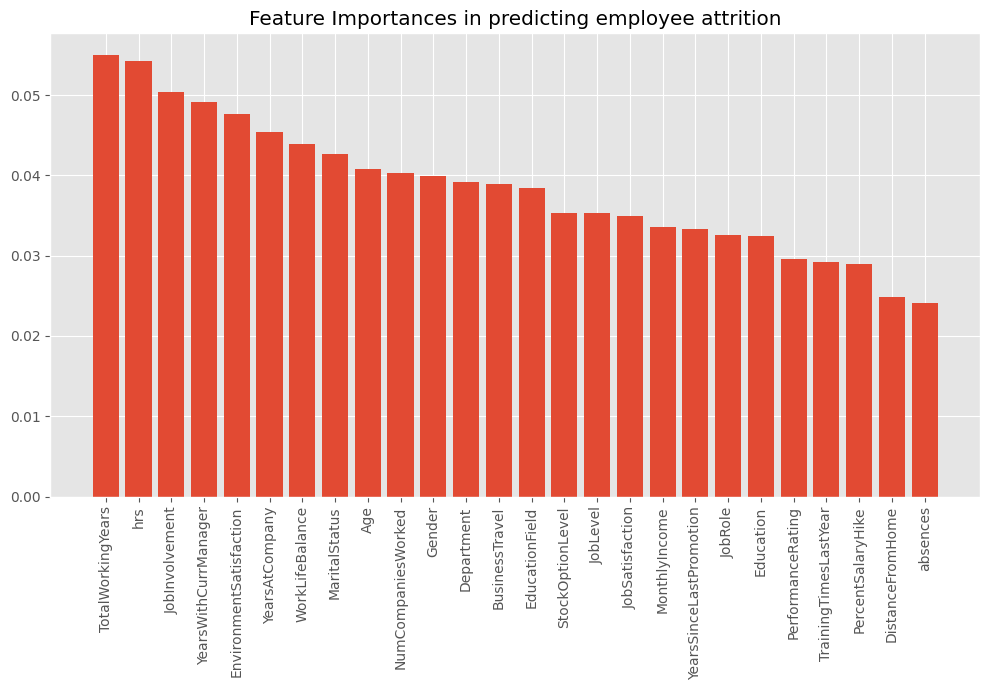

<ipython-input-51-360cd2d0408b>:19: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(trial)


<Figure size 2500x2000 with 0 Axes>

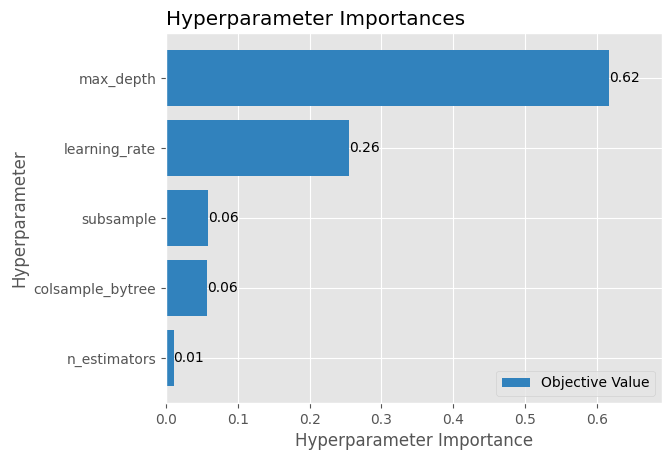

In [51]:
import seaborn as sns

importances = optuna_xg_clf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,7))
plt.title("Feature Importances in predicting employee attrition")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

from optuna.visualization.matplotlib import plot_param_importances
fig = plt.figure(figsize=(25,20))
trial = optuna_xg_clf.study_
plot_param_importances(trial)
plt.show()

### Training of the final model on the full dataset


Now we will train our model against using the entire training set, using the best hyperparameters found from Optuna.

In [59]:
print(optuna_xg_clf.best_params_)

{'n_estimators': 261, 'max_depth': 7, 'learning_rate': 0.19646376239990151, 'subsample': 0.7065456737968283, 'colsample_bytree': 0.7425789859548375}


In [58]:
final_model = xgboost_model = XGBClassifier(
    n_estimators=optuna_xg_clf.best_params_['n_estimators'],
    max_depth=optuna_xg_clf.best_params_['max_depth'],
    learning_rate=optuna_xg_clf.best_params_['learning_rate'],
    subsample=optuna_xg_clf.best_params_['subsample'],
    colsample_bytree=optuna_xg_clf.best_params_['colsample_bytree'],
    random_state=NIU)

y_XG = y.map({'No': 0, 'Yes': 1})

start = time.time()
final_model.fit(X, y_XG)
end = time.time()

print(f"Execution time: {end-start}s")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7425789859548375, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19646376239990151,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=261, n_jobs=None,
              num_parallel_tree=None, random_state=100547834, ...)

Upload the competition dataset, if needed, called "attrition_compet_26.pkl".

In [60]:
uploaded = files.upload()

Saving attrition_compet_26.pkl to attrition_compet_26.pkl


Data preproccesing

In [61]:
X_compet = pd.read_pickle("attrition_compet_26.pkl")

# Display the shape of features and target
print("Shape of X (features):", X_compet.shape)

# Feature names and target options
feature_names = X_compet.columns.tolist()

print("Feature names:", feature_names)
print("Target options:", target_names)

for col in categorical_cols:
    X_compet[col] = le.fit_transform(X_compet[col])

X_compet.drop(sg_val_cols, axis=1, inplace=True)

print("The following features contain missing values (NaN):")

for i, val in X_compet.isnull().mean().items():
    if not val == 0:
        print(f'{i}: {val*100}%')

X_compet = pd.DataFrame(ii.fit_transform(X))

Shape of X (features): (200, 30)
Feature names: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Target options: ['Yes' 'No']
The following features contain missing values (NaN):
PerformanceRating: 15.5%
WorkLifeBalance: 1.0%
Education: 8.0%
NumCompaniesWorked: 1.0%
TotalWorkingYears: 0.5%
TrainingTimesLastYear: 6.0%


Applying our model to the dataset and saving our model in pickle format and predictions in csv format

In [62]:
import pickle

y_competition_pred = final_model.predict(X_compet)
y_competition_pred = pd.Series(y_competition_pred).map({0: 'No', 1: 'Yes'})

competition_results = pd.DataFrame({'Id': range(len(y_competition_pred)), 'Prediction': y_competition_pred})
competition_results.to_csv('competition_predictions.csv', index=False)

# Save the model to a file
with open('final_xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)
